# Section 1: Loading and Exploring the Data

In [12]:
import pandas as pd
df = pd.read_csv('/content/Churn_Modelling.csv')

In [13]:

print("First few rows of the dataset:")
print(df.head())


print("\nBasic Information:")
info_df = pd.DataFrame({
    'Info': ['Number of Rows', 'Number of Columns', 'Column Names', 'Data Types'],
    'Values': [df.shape[0], df.shape[1], ', '.join(df.columns), ', '.join(df.dtypes.astype(str))]
})
print(info_df)


print("\nSummary Statistics:")
print(df.describe(include='all'))

#conducting exploratory data analysis

print("\nData Types and Missing Values:")
data_types_df = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum()
})
print(data_types_df)


First few rows of the dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         9

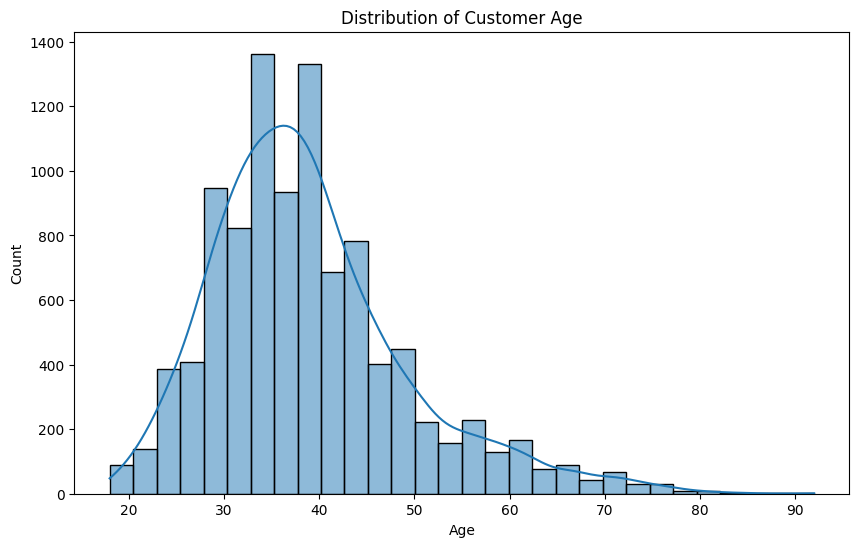

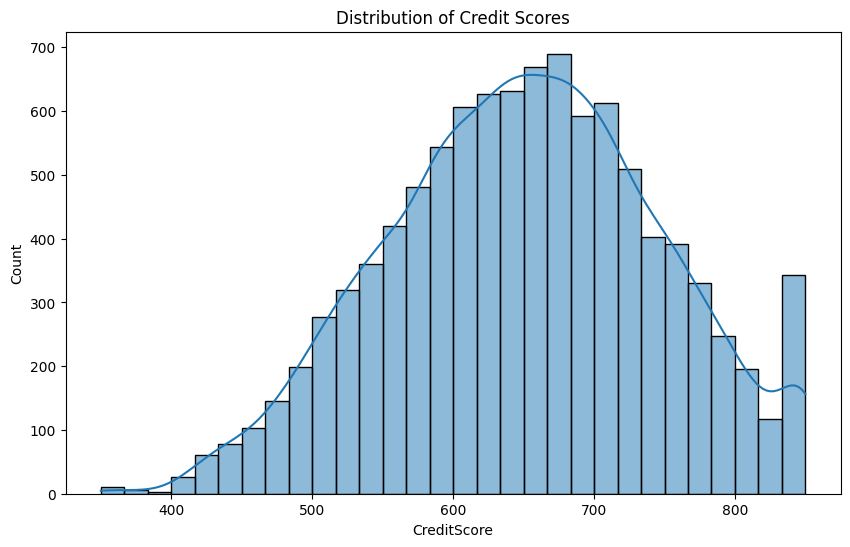

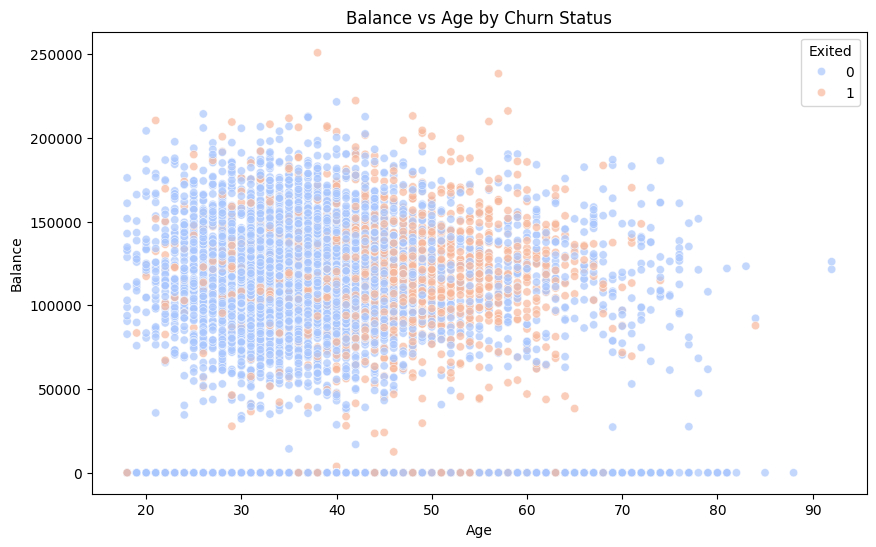

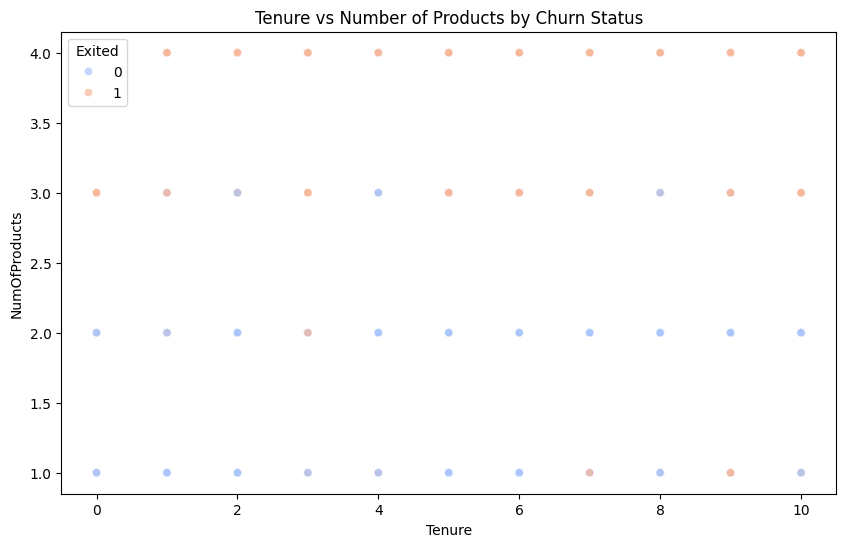

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Customer Age')
plt.show()

# Credit Score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['CreditScore'], bins=30, kde=True)
plt.title('Distribution of Credit Scores')
plt.show()

# Balance vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=df, palette='coolwarm', alpha=0.7)
plt.title('Balance vs Age by Churn Status')
plt.show()

# Tenure vs Number of Products
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure', y='NumOfProducts', hue='Exited', data=df, palette='coolwarm', alpha=0.7)
plt.title('Tenure vs Number of Products by Churn Status')
plt.show()

**Insights derived from visualization**:

1.   The most common age range for customers at this bank is between **30 and 40**, with a peak around **32**, with nearly 1400 customers at that age range. The distribution of the graph seems to be right-skewed.
2.  Most customers seem to have a credit-score around 650.
3. Customers aged 50-60, who have balances ranging from $100,000 - $150,000, are the most likely to have left the bank.




# Section 2: RFM Analysis

This section calculates the **Recency, Frequency, and Monetary value**. In the context of this banking dataset:

**Recency:** will be assigned the value of **"Tenure"**, which represents the time the customer has spent with the bank.

**Frequency:** is represented by the number of **'Products'** that the customer currently has with the bank.

**Monetary:** is assigned the 'Balance' value.

In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#rfm scores
df['Recency'] = df['Tenure']
df['Frequency'] = df['NumOfProducts']
df['Monetary'] = df['Balance']

scaler = MinMaxScaler() # Normalizing the RFM scores using MinMaxScaler
df[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(df[['Recency', 'Frequency', 'Monetary']])

#defining the RFM segment categorization function
def rfm_segment(row):
    if row['Recency'] > 0.5 and row['Monetary'] > 0.5:
        return 'High Value'
    elif row['Recency'] < 0.5 and row['Monetary'] < 0.5:
        return 'Low Value'
    else:
        return 'Medium Value'


df['RFM_Segment'] = df.apply(rfm_segment, axis=1) # applying the RFM segment categorization to the DataFrame


high_value_customers = df[df['RFM_Segment'] == 'High Value'].sort_values(by='Monetary', ascending=False).head(5) # Identify top 5 High-Value customers

low_value_customers = df[df['RFM_Segment'] == 'Low Value'].sort_values(by='Monetary', ascending=True).head(5) #Identify top 5 Low-Value customers


print("Top 5 High-Value Customers:")
print(high_value_customers[['Recency', 'Frequency', 'Monetary', 'RFM_Segment']])

print("\nTop 5 Low-Value Customers:")
print(low_value_customers[['Recency', 'Frequency', 'Monetary', 'RFM_Segment']])

Top 5 High-Value Customers:
      Recency  Frequency  Monetary RFM_Segment
8733      0.9   0.000000  0.885888  High Value
8702      0.9   0.000000  0.846216  High Value
3150      0.9   0.333333  0.824513  High Value
8982      0.8   0.000000  0.823696  High Value
6913      0.7   0.000000  0.822364  High Value

Top 5 Low-Value Customers:
      Recency  Frequency  Monetary RFM_Segment
0         0.2   0.000000       0.0   Low Value
7011      0.1   0.333333       0.0   Low Value
3650      0.3   0.333333       0.0   Low Value
7014      0.2   0.333333       0.0   Low Value
3645      0.3   0.000000       0.0   Low Value


**The code above helps to identify the top 5 high value and top 5 low value customers. This helps to derive actionable insights into further understanding the bank's customer base. Customers with high monetary value are the bank's most profitable customers.**

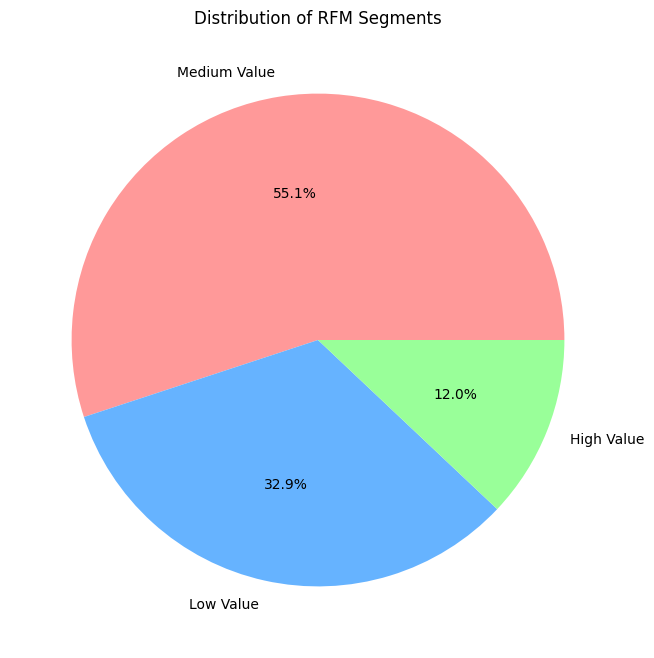

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

df['RFM_Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of RFM Segments')
plt.ylabel('')
plt.show()

## Most customers at this bank are Medium-value customers.

# Section 3: Customer Churn Rate By Category

<Figure size 1400x800 with 0 Axes>

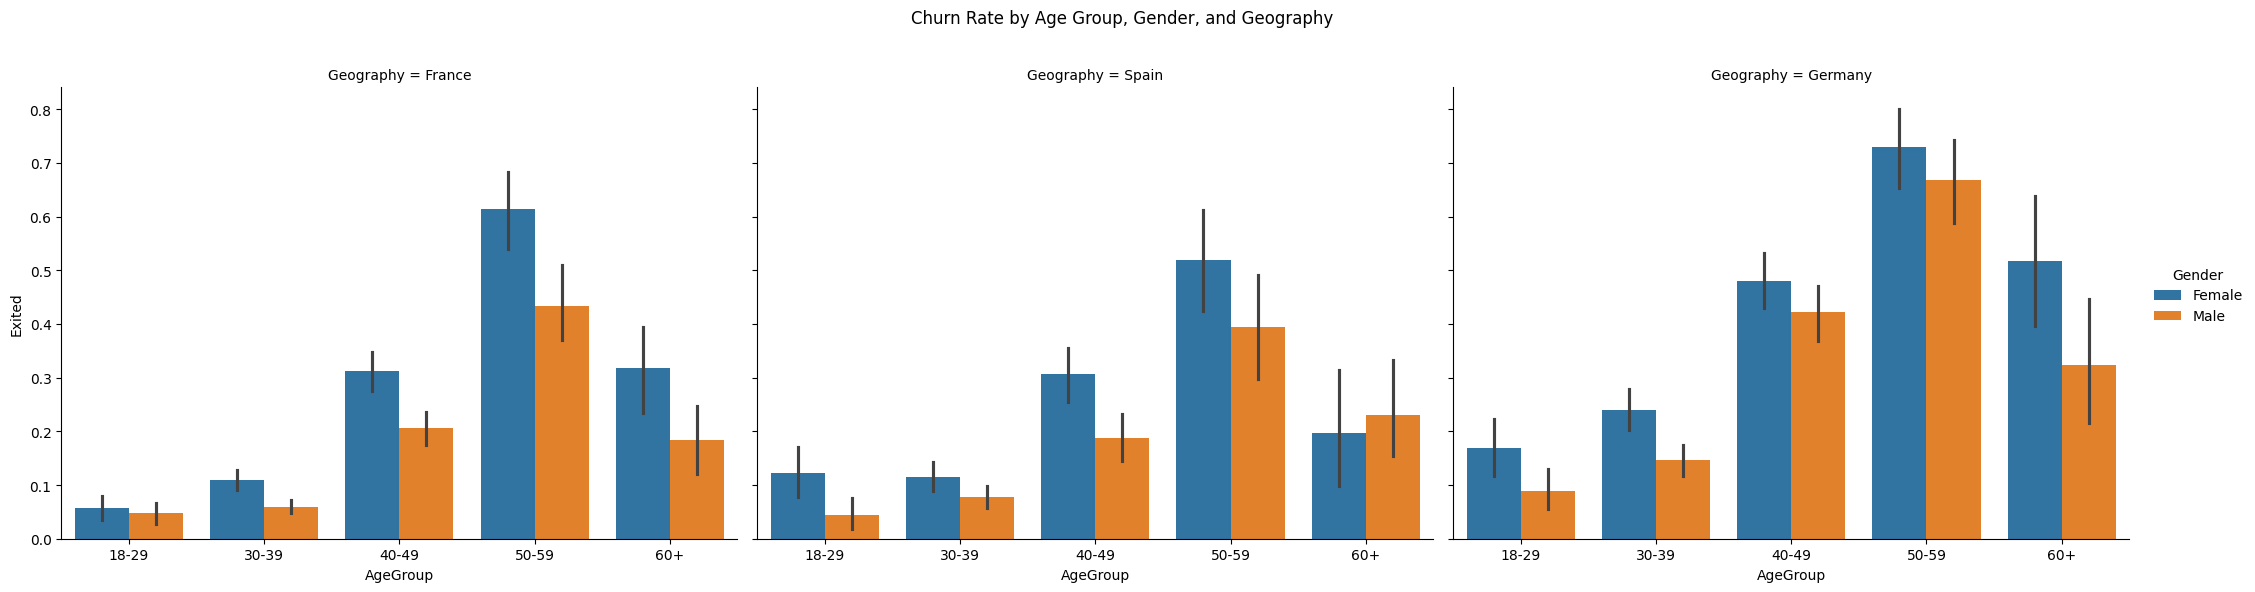

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

bins = [18, 30, 40, 50, 60, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(14, 8))
sns.catplot(x='AgeGroup', y='Exited', hue='Gender', col='Geography', data=df, kind='bar', height=6, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Churn Rate by Age Group, Gender, and Geography')
plt.show()


# In France, Spain, and Germany, the age range of 50-59 and the female gender are the most common among customers who exited the bank


# Section 4: Analyzing at-risk customers


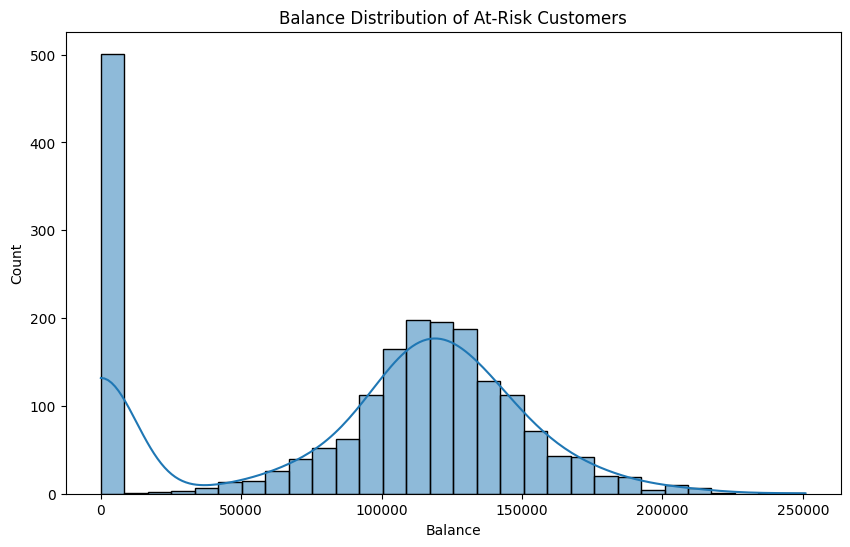

In [18]:
at_risk_customers = df[df['Exited'] == 1]

#visualizing
plt.figure(figsize=(10, 6))
sns.histplot(at_risk_customers['Balance'], bins=30, kde=True)
plt.title('Balance Distribution of At-Risk Customers')
plt.show()

#As anticipated, the highest number of at-risk customers have a balance of 0.The rest of the balance distribution appears to follow a normal distribution.

# Section 5: Customer Lifetime Value

In [19]:

df['CLV'] = df['Balance'] * (df['Tenure'] / df['Tenure'].max())

print(df[['CustomerId', 'CLV']].head(20))

    CustomerId         CLV
0     15634602       0.000
1     15647311    8380.786
2     15619304  127728.640
3     15701354       0.000
4     15737888   25102.164
5     15574012   91004.624
6     15592531       0.000
7     15656148   46018.696
8     15792365   56820.428
9     15592389   26920.776
10    15767821   61210.032
11    15737173       0.000
12    15632264       0.000
13    15691483       0.000
14    15600882       0.000
15    15643966   42938.823
16    15737452   13260.288
17    15788218       0.000
18    15661507       0.000
19    15568982       0.000


# Insights:


*   The bank should focus on clients with high CLVs, and promote retention through personalized services, offers and other marketing campaigns.
*   For customers with medium or low CLV, the bank should aim to increase thier value and overall engagement. This can be done by providing credit card, loans and investment offers.







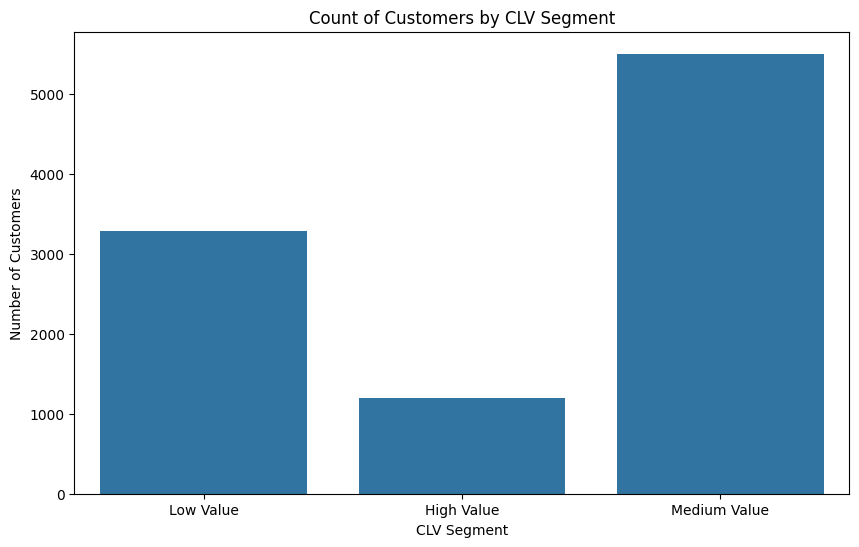

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RFM_Segment', data=df)
plt.title('Count of Customers by CLV Segment')
plt.xlabel('CLV Segment')
plt.ylabel('Number of Customers')
plt.show()


As the bar plot suggests above, most customers at this bank have medium CLVs.

#Section 6: K-Means Clustering- Customer Segmentation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

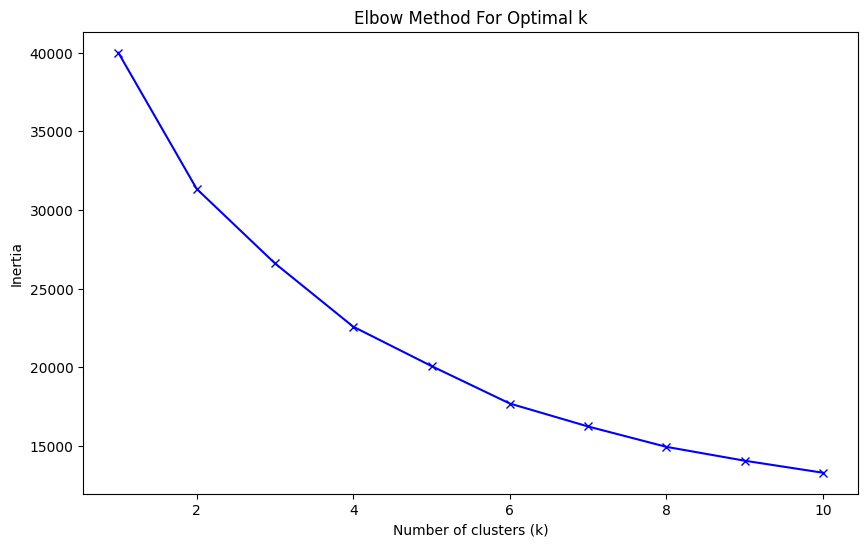

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
    CreditScore        Age        Balance  EstimatedSalary
0   655.352039  36.109615  122039.487213     49656.428642
1   649.018942  59.292818   80640.615533     96722.190118
2   648.401203  35.742256    1390.845759     99385.665669
3   649.100914  36.098720  121334.962168    151797.591159


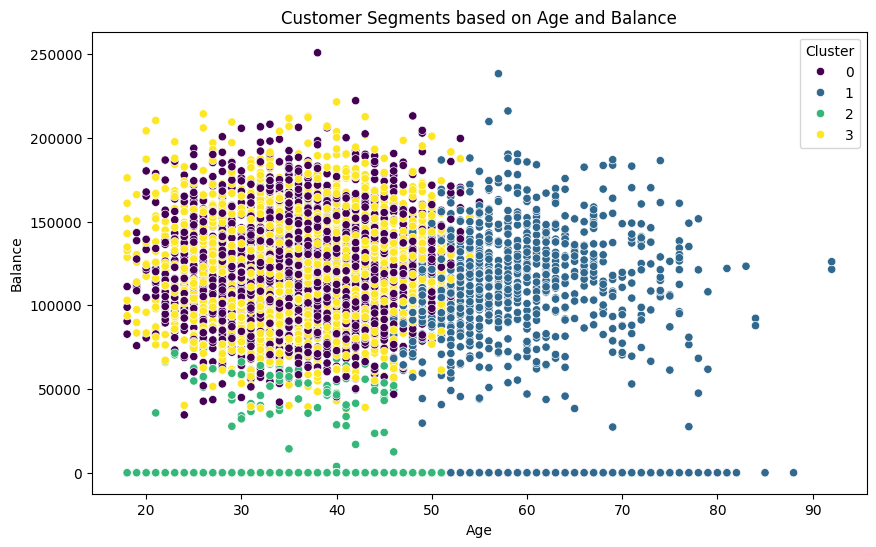

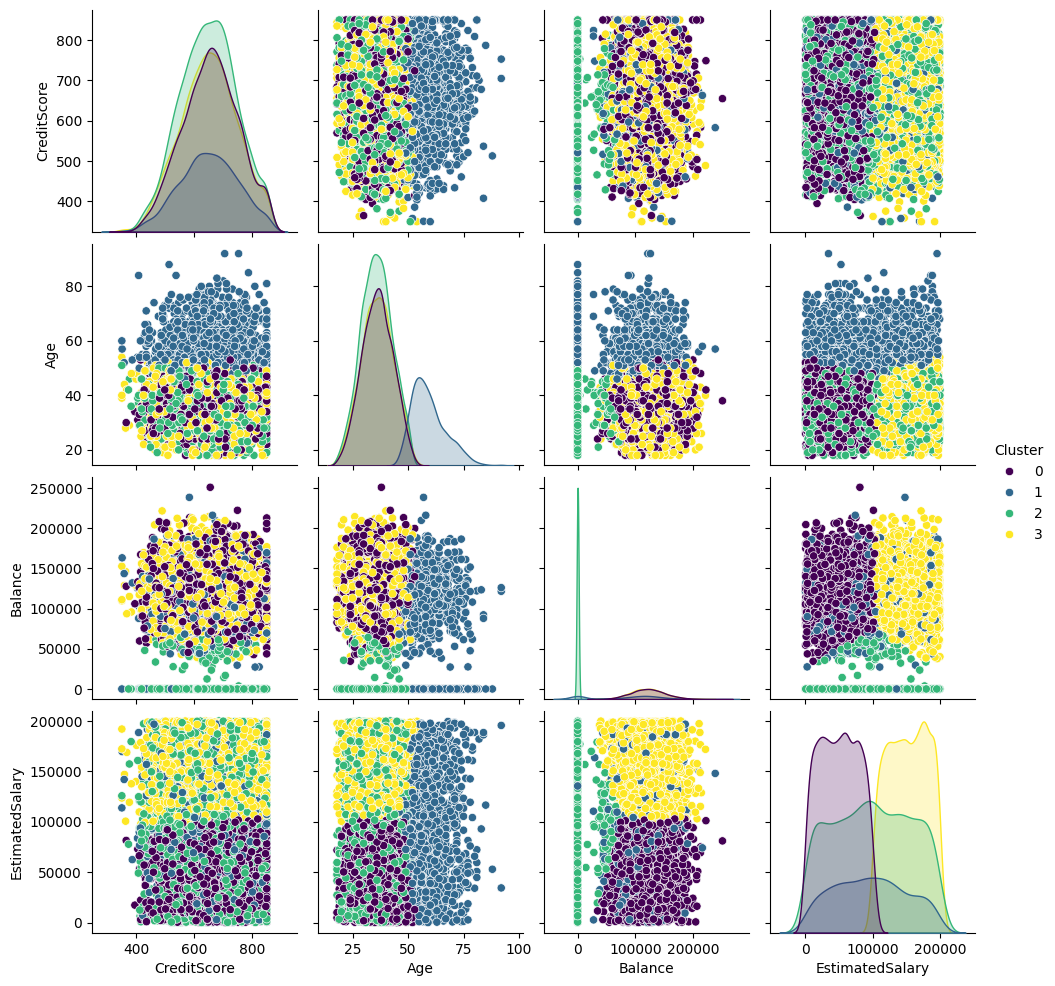

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

X = df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] # selecting features for clustering

scaler = StandardScaler() #scaling features for equal contribution to K-means distance calculation
X_scaled = scaler.fit_transform(X)

# implementing the "elbow" curve idea to identify the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled) #choosing optimal number of clusters

cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
print("Cluster Centers:\n", cluster_centers)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Balance', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments based on Age and Balance')
plt.show()


sns.pairplot(df, hue='Cluster', vars=['CreditScore', 'Age', 'Balance', 'EstimatedSalary'], palette='viridis') #plotting a pairplot
plt.show()


These cluster centers represent the average values of `CreditScore`, `Age`, `Balance`, and `EstimatedSalary` for each group of customers identified by the K-Means clustering algorithm, indicating the typical profile for each cluster.

From the pairplot, it is observed that the histogram curve for `CreditScore` appears to be normally distributed, suggesting most customers at this bank have a credit score near the average.

